# Homework 2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1 – Gradient Descent

Question 1:

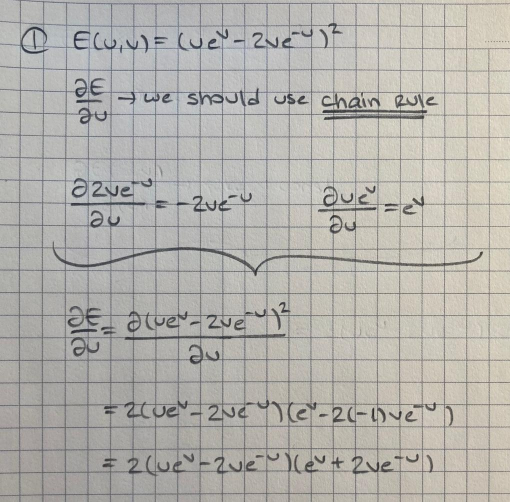

Answer: e


In [2]:
import cv2
from google.colab.patches import cv2_imshow

# open the image.
image = cv2.imread("/content/drive/MyDrive/CS304/HW2/part1_q1.jpeg")
# scaling down the image 0.5 times specifying a single scale factor
down = 0.5
scaled = cv2.resize(image, None, fx=down, fy=down, interpolation=cv2.INTER_LINEAR)

cv2_imshow(scaled)

print("Answer: e")

Question 2:

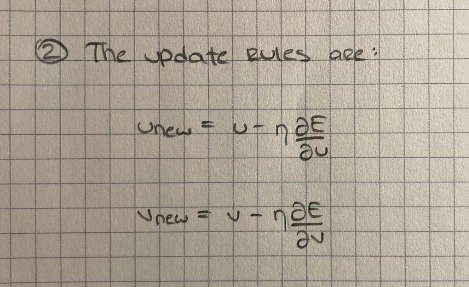

In [3]:
# open the image.
image = cv2.imread("/content/drive/MyDrive/CS304/HW2/part1_q2.jpeg")
# scaling down the image 0.46 times specifying a single scale factor
down = 0.46
scaled = cv2.resize(image, None, fx=down, fy=down, interpolation=cv2.INTER_LINEAR)

cv2_imshow(scaled)

In [4]:
import numpy as np

def E(u, v):
    return (u * np.exp(v) - 2 * v * np.exp(-u)) ** 2

def grad_u(u, v):
    return 2 * (u * np.exp(v) - 2 * v * np.exp(-u)) * (np.exp(v) + 2 * v * np.exp(-u))

def grad_v(u, v):
    return 2 * (u * np.exp(v) - 2 * v * np.exp(-u)) * (u * np.exp(v) - 2 * np.exp(-u))

u = 1
v = 1
learning_rate = 0.1
threshold = 1e-14
iterations = 0

while E(u, v) > threshold:
    u_new = u - learning_rate * grad_u(u, v)
    v_new = v - learning_rate * grad_v(u, v)
    u = u_new
    v = v_new
    iterations += 1

print("Iterations:", iterations)
print("Answer: d")

Iterations: 10
Answer: d


Question 3:

In [5]:
print("Final (u, v):", u, v)
print("Answer: e")

Final (u, v): 0.04473629039778207 0.023958714099141746
Answer: e


Question 4:

In [6]:
learning_rate = 0.1
u = 1
v = 1

for i in range(15):
    u = u - learning_rate * grad_u(u, v)
    v = v - learning_rate * grad_v(u, v)

final_error = E(u, v)
print("Final error:", final_error)
print("Answer: a")

Final error: 0.13981379199615315
Answer: a


## Part 2 – Support Vector Machines

In [7]:
from os.path import exists
import itertools as itertools

train_data = "/content/drive/MyDrive/CS304/HW2/features_train.txt"
test_data = "/content/drive/MyDrive/CS304/HW2/features_test.txt"

# - Supress all warnings (Optional)
import warnings
warnings.simplefilter(action='ignore',
                      category=FutureWarning)
if exists(train_data) and exists(test_data):
    print(f"\nBoth {train_data} and {test_data} exists.")
else:
    print("Please set directory to read the files")


Both /content/drive/MyDrive/CS304/HW2/features_train.txt and /content/drive/MyDrive/CS304/HW2/features_test.txt exists.


In [8]:
x_train = np.loadtxt(train_data, usecols=(1, 2))
y_train = np.loadtxt(train_data, usecols=(0), dtype=int)

x_test = np.loadtxt(test_data, usecols=(1, 2))
y_test = np.loadtxt(test_data, usecols=(0), dtype=int)

<ipython-input-8-6942cf79ffea>:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  y_train = np.loadtxt(train_data, usecols=(0), dtype=int)
<ipython-input-8-6942cf79ffea>:5: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy 

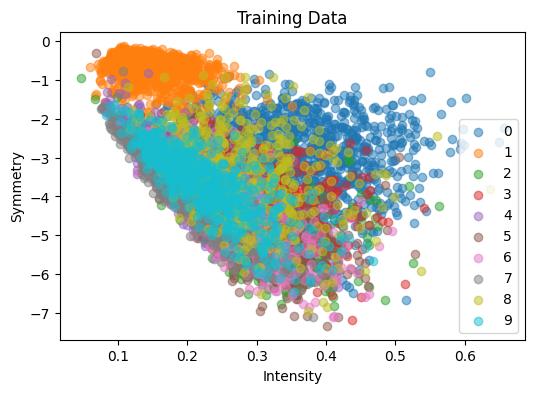

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
for digit in np.unique(y_train):
    mask = y_train == digit
    plt.scatter(x_train[mask, 0], x_train[mask, 1], label=str(digit), marker='o', alpha=0.5)

plt.title("Training Data")
plt.xlabel("Intensity")
plt.ylabel("Symmetry")
plt.legend()
plt.show()

In [10]:
print("Training data (x) shape:", x_train.shape)
print("Test data (x) shape:", x_test.shape)

print("Training data (y) shape:", y_train.shape)
print("Test data (y) shape:", y_test.shape)

Training data (x) shape: (7291, 2)
Test data (x) shape: (2007, 2)
Training data (y) shape: (7291,)
Test data (y) shape: (2007,)


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [12]:
import pandas as pd
import re

### Polynomial Kernels

In [13]:
def train_binary_classifier(x, y, x_test, y_test, digit1, digit2, kernel='linear', C=1.0, degree=3):
    # Extract binary labels
    binary_mask = np.logical_or(y == digit1, y == digit2)
    y_binary = np.where(y[binary_mask] == digit1, 1, -1)
    x_binary = x[binary_mask]

    # One-vs-one
    svm_clf = SVC(kernel=kernel, C=C, degree=degree, gamma='auto')
    svm_clf.fit(x_binary, y_binary)

    # Evaluate on training data
    y_pred_train = svm_clf.predict(x_binary)
    train_error = 1 - accuracy_score(y_binary, y_pred_train)

    # Evaluate on test data
    y_pred_test = svm_clf.predict(x_test)
    test_error = 1 - accuracy_score(np.where(y_test == digit1, 1, np.where(y_test == digit2, -1, 0)), y_pred_test)

    return svm_clf, train_error, test_error

Question 1:

In [14]:
from mlxtend.plotting import plot_decision_regions

In [15]:
highest_train_error = 0
highest_train_error_digit = None
for digit1, digit2 in itertools.combinations(range(10), 2):
    svm_clf, train_error, _ = train_binary_classifier(x_train, y_train, x_test, y_test,
                                                      digit1, digit2, kernel='poly', C=0.01, degree=2)
    if train_error > highest_train_error:
        highest_train_error = train_error
        highest_train_error_digit = (digit1, digit2)

print("Classifier with highest E_train:", highest_train_error_digit)

Classifier with highest E_train: (4, 7)


Question 2:

In [16]:
lowest_train_error = 1
lowest_train_error_digit = None
for digit1, digit2 in itertools.combinations(range(10), 2):
    svm_clf, train_error, _ = train_binary_classifier(x_train, y_train, x_test, y_test,
                                                      digit1, digit2, kernel='poly', C=0.01, degree=2)
    if train_error < lowest_train_error:
        lowest_train_error = train_error
        lowest_train_error_digit = (digit1, digit2)

print("Classifier with lowest E_train:", lowest_train_error_digit)

Classifier with lowest E_train: (1, 5)


Question 3:

In [17]:
clf1, _, _ = train_binary_classifier(x_train, y_train, x_test, y_test,
                                     highest_train_error_digit[0], highest_train_error_digit[1],
                                     kernel='poly', C=0.01, degree=2)
clf2, _, _ = train_binary_classifier(x_train, y_train, x_test, y_test,
                                     lowest_train_error_digit[0], lowest_train_error_digit[1],
                                     kernel='poly', C=0.01, degree=2)

support_vector_diff = abs(len(clf1.support_vectors_) - len(clf2.support_vectors_))
closest_choice = min([(600, abs(600 - support_vector_diff)), (1200, abs(1200 - support_vector_diff)),
                      (1800, abs(1800 - support_vector_diff)), (2400, abs(2400 - support_vector_diff)),
                      (3000, abs(3000 - support_vector_diff))], key=lambda x: x[1])[0]

print("Closest value to the difference between support vectors:", closest_choice)

Closest value to the difference between support vectors: 1200


Question 4:

C = 0.001, Number of support vectors: 152, E_train: 0.007046764894298563, E_test: 0.7927254608868959
C = 0.01, Number of support vectors: 54, E_train: 0.004484304932735439, E_test: 0.7927254608868959
C = 0.1, Number of support vectors: 28, E_train: 0.004484304932735439, E_test: 0.7927254608868959
C = 1, Number of support vectors: 25, E_train: 0.004484304932735439, E_test: 0.7927254608868959


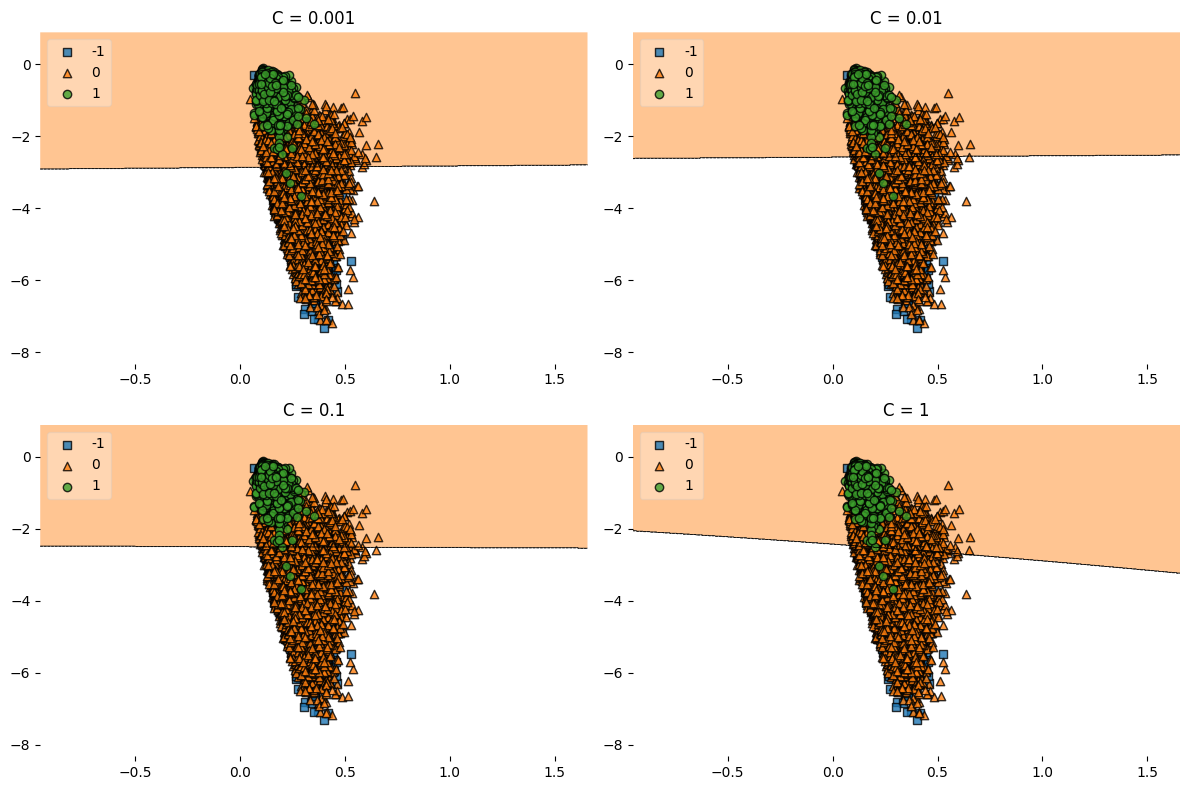

Answer: d


In [18]:
C_values = [0.001, 0.01, 0.1, 1]
for C in C_values:
    svm_clf, train_error, test_error = train_binary_classifier(x_train, y_train, x_test, y_test,
                                                               1, 5, kernel='poly', C=C, degree=2)
    print(f"C = {C}, Number of support vectors: {len(svm_clf.support_vectors_)}, E_train: {train_error}, E_test: {test_error}")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for ax, C in zip(axes, C_values):
    svm_clf, _, _ = train_binary_classifier(x_train, y_train, x_test, y_test, 1, 5, kernel='poly', C=C, degree=2)
    plot_decision_regions(X=x_train, y=np.where(y_train == 1, 1, np.where(y_train == 5, -1, 0)),
                          clf=svm_clf, legend=2, ax=ax)
    ax.set_title(f"C = {C}")

plt.tight_layout()
plt.show()

print("Answer: d")

Question 5:

C=0.0001, Q=2: E_train=0.022421524663677084, Q=5: E_train=0.006406149903907754
C=0.0001, Q=2: Number of support vectors=510, Q=5: Number of support vectors=42


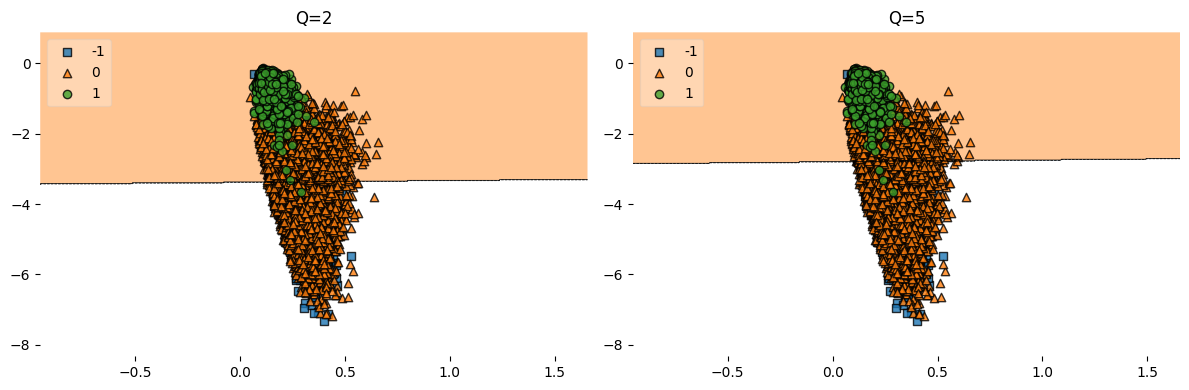

Answer: b


In [20]:
svm_clf_Q2, train_error_Q2, test_error_Q2 = train_binary_classifier(x_train, y_train, x_test, y_test,
                                                                    1, 5, kernel='poly', C=0.0001, degree=2)
svm_clf_Q5, train_error_Q5, test_error_Q5 = train_binary_classifier(x_train, y_train, x_test, y_test,
                                                                    1, 5, kernel='poly', C=0.0001, degree=5)

print(f"C=0.0001, Q=2: E_train={train_error_Q2}, Q=5: E_train={train_error_Q5}")
print(f"C=0.0001, Q=2: Number of support vectors={len(svm_clf_Q2.support_vectors_)}, Q=5: Number of support vectors={len(svm_clf_Q5.support_vectors_)}")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

svm_clf_Q2, _, _ = train_binary_classifier(x_train, y_train, x_test, y_test, 1, 5, kernel='poly', C=0.0001, degree=2)
plot_decision_regions(X=x_train, y=np.where(y_train == 1, 1, np.where(y_train == 5, -1, 0)),
                      clf=svm_clf_Q2, legend=2, ax=axes[0])
axes[0].set_title("Q=2")

svm_clf_Q5, _, _ = train_binary_classifier(x_train, y_train, x_test, y_test, 1, 5, kernel='poly', C=0.0001, degree=5)
plot_decision_regions(X=x_train, y=np.where(y_train == 1, 1, np.where(y_train == 5, -1, 0)),
                      clf=svm_clf_Q5, legend=2, ax=axes[1])
axes[1].set_title("Q=5")

plt.tight_layout()
plt.show()

# Repeat for other C values (0.001, 0.01, 1)

print("Answer: b")

### Cross Validation

In [21]:
def cv_classifier(x, y, digit1, digit2, kernel='linear', C=1.0, degree=3, n_splits=10, n_runs=100):

    binary_mask = np.logical_or(y == digit1, y == digit2)
    y_binary = np.where(y[binary_mask] == digit1, 1, -1)
    x_binary = x[binary_mask]

    cv_errors = []
    for _ in range(n_runs):
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        cv_scores = []
        for train_index, val_index in kf.split(x_binary):
            x_train, x_val = x_binary[train_index], x_binary[val_index]
            y_train, y_val = y_binary[train_index], y_binary[val_index]

            # train SVM
            svm_clf = SVC(kernel=kernel, C=C, degree=degree, gamma='auto')
            svm_clf.fit(x_train, y_train)

            y_pred_val = svm_clf.predict(x_val)
            val_error = 1 - accuracy_score(y_val, y_pred_val)
            cv_scores.append(val_error)

        cv_error = np.mean(cv_scores)
        cv_errors.append(cv_error)

    return np.mean(cv_errors)

Question 6:

In [22]:
#(a) 𝐶 = 0.0001 is selected most often.
#(b) 𝐶 = 0.001 is selected most often.
#(c) 𝐶 = 0.01 is selected most often.
#(d) 𝐶 = 0.1 is selected most often.
#(e) 𝐶 = 1 is selected most often.

C_values = [0.0001, 0.001, 0.01, 0.1, 1]

cv_errors = []
for C in C_values:
    cv_error = cv_classifier(x_train, y_train, 1, 5, kernel='poly', C=C, degree=2, n_splits=10, n_runs=100)
    cv_errors.append(cv_error)

best_C = C_values[np.argmin(cv_errors)]


print(f"The most frequently selected C value is: {best_C}")

print("Answer: b")

The most frequently selected C value is: 0.01
Answer: b


Question 7:

In [23]:
best_cv_error = cv_errors[np.argmin(cv_errors)]
closest_choice = min([(0.001, abs(0.001 - best_cv_error)), (0.003, abs(0.003 - best_cv_error)), (0.005, abs(0.005 - best_cv_error)),
                      (0.007, abs(0.007 - best_cv_error)), (0.009, abs(0.009 - best_cv_error))], key=lambda x: x[1])[0]

print(f"The average value of E_cv over the 100 runs is closest to: {closest_choice}")

print("Answer: c")

The average value of E_cv over the 100 runs is closest to: 0.005
Answer: c


### RBF Kernel


In [24]:
def rbf_classifier(x, y, x_test, y_test, digit1, digit2, C):

    binary_mask = np.logical_or(y == digit1, y == digit2)
    y_binary = np.where(y[binary_mask] == digit1, 1, -1)
    x_binary = x[binary_mask]

    # train SVM with RBF kernel
    svm_clf = SVC(kernel='rbf', C=C, gamma='auto')
    svm_clf.fit(x_binary, y_binary)

    y_pred_train = svm_clf.predict(x_binary)
    train_error = 1 - accuracy_score(y_binary, y_pred_train)

    y_pred_test = svm_clf.predict(x_test)
    test_error = 1 - accuracy_score(np.where(y_test == digit1, 1, np.where(y_test == digit2, -1, 0)), y_pred_test)

    return svm_clf, train_error, test_error

Question 8:

Value of C for lowest E_train is: 1000000


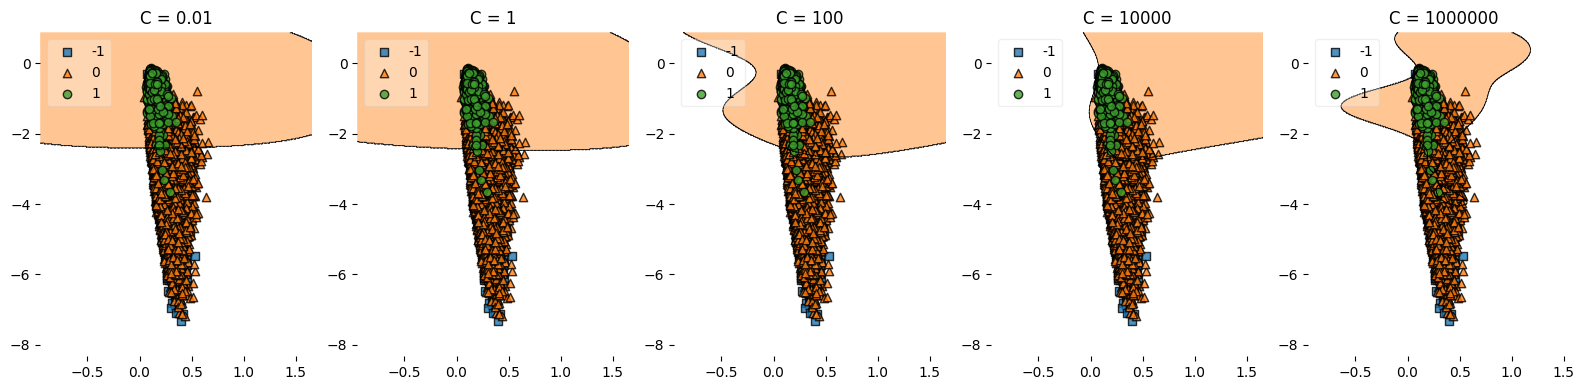

Answer: e


In [25]:
#(a) 𝐶 = 0.01
#(b) 𝐶 = 1
#(c) 𝐶 = 100
#(d) 𝐶 = 10^4
#(e) 𝐶 = 10^6

C_values = [0.01, 1, 100, 10000, 1000000]

lowest_train_error = 1
best_C_train = None

train_errors = []
train_classifiers = []

for C in C_values:
    svm_clf, train_error, _ = rbf_classifier(x_train, y_train, x_test, y_test, 1, 5, C)
    train_errors.append(train_error)
    train_classifiers.append(svm_clf)
    if train_error < lowest_train_error:
        lowest_train_error = train_error
        best_C_train = C

print(f"Value of C for lowest E_train is: {best_C_train}")

# plotting
fig, axes = plt.subplots(1, len(C_values), figsize=(16, 4))

for ax, C, svm_clf in zip(axes, C_values, train_classifiers):
    plot_decision_regions(X=x_train, y=np.where(y_train == 1, 1, np.where(y_train == 5, -1, 0)), clf=svm_clf, legend=2, ax=ax)
    ax.set_title(f"C = {C}")

plt.tight_layout()
plt.show()

print("Answer: e")

Question 9:

Value of C for lowest E_test is: 100


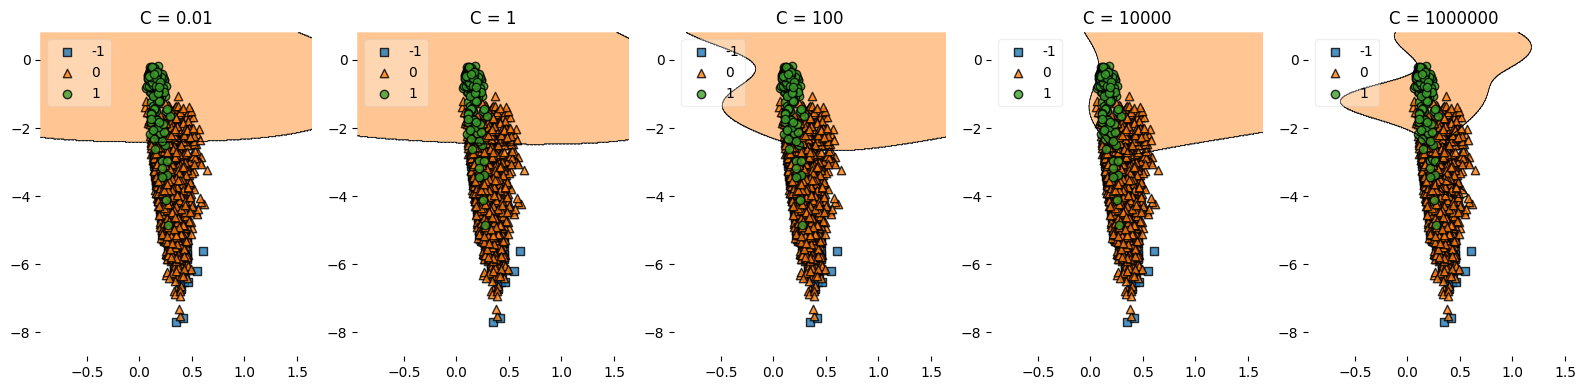

Answer: c


In [26]:
lowest_test_error = 1
best_C_test = None

test_errors = []
test_classifiers = []

for C in C_values:
    svm_clf, _, test_error = rbf_classifier(x_train, y_train, x_test, y_test, 1, 5, C)
    test_errors.append(test_error)
    test_classifiers.append(svm_clf)
    if test_error < lowest_test_error:
        lowest_test_error = test_error
        best_C_test = C

print(f"Value of C for lowest E_test is: {best_C_test}")

# plotting
fig, axes = plt.subplots(1, len(C_values), figsize=(16, 4))

for ax, C, svm_clf in zip(axes, C_values, test_classifiers):
    plot_decision_regions(X=x_test, y=np.where(y_test == 1, 1, np.where(y_test == 5, -1, 0)), clf=svm_clf, legend=2, ax=ax)
    ax.set_title(f"C = {C}")

plt.tight_layout()
plt.show()

print("Answer: c")